# 문제

In [1]:
'''
1. 기상청 날씨누리 ( http://www.weather.go.kr/weather/observation/currentweather.jsp )에서 현재 기온과 습도를 수집하시오
2. 수집한 데이터를 csv 파일로 저장하시오
3. 2에서 저장한 csv 파일을 읽어서 읽은 데이터를 데이터프레임에 저장하시오.
4.  서울, 부산, 대구, 대전, 광주, 부산의 현재기온과 습도를 막대그래프로 시각화 하시오.
'''

'\n1. 기상청 날씨누리 ( http://www.weather.go.kr/weather/observation/currentweather.jsp )에서 현재 기온과 습도를 수집하시오\n2. 수집한 데이터를 csv 파일로 저장하시오\n3. 2에서 저장한 csv 파일을 읽어서 읽은 데이터를 데이터프레임에 저장하시오.\n4.  서울, 부산, 대구, 대전, 광주, 부산의 현재기온과 습도를 막대그래프로 시각화 하시오.\n'

## 1. 기상청 날씨누리 ( http://www.weather.go.kr/weather/observation/currentweather.jsp )에서 현재 기온과 습도를 수집하시오

In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
# 기상청 현재 날씨 url
url = "https://www.weather.go.kr/weather/observation/currentweather.jsp"

# soup 생성
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

In [4]:
table = soup.find('table', {'class': 'table_develop3'})

In [5]:
data = []

for tr in table.find_all('tr'):
    tds = list(tr.find_all('td'))
    
    for td in tds:
        if td.find('a'):
            point = td.find('a').text
            temperature = tds[5].text
            humidity = tds[9].text
            data.append([point, temperature, humidity])

In [6]:
data

[['강릉', '31.4', '63'],
 ['강진군', '29.3', '76'],
 ['강화', '29.9', '68'],
 ['거제', '29.4', '74'],
 ['거창', '28.4', '76'],
 ['경주시', '33.4', '56'],
 ['고산', '30.3', '77'],
 ['고창', '32.2', '61'],
 ['고창군', '31.8', '63'],
 ['고흥', '28.9', '69'],
 ['광양시', '30.2', '70'],
 ['광주', '30.2', '76'],
 ['구미', '32.0', '62'],
 ['군산', '30.2', '65'],
 ['금산', '29.9', '70'],
 ['김해시', '32.6', '64'],
 ['남원', '30.4', '67'],
 ['남해', '29.9', '72'],
 ['대관령', '25.7', '79'],
 ['대구', '32.9', '52'],
 ['대전', '32.1', '62'],
 ['동두천', '30.0', '75'],
 ['동해', '27.3', '92'],
 ['목포', '30.6', '66'],
 ['문경', '29.6', '73'],
 ['밀양', '31.9', '60'],
 ['백령도', '26.9', '87'],
 ['보령', '30.2', '63'],
 ['보성군', '30.1', '73'],
 ['보은', '30.1', '68'],
 ['봉화', '28.1', '65'],
 ['부산', '30.9', '68'],
 ['부안', '31.0', '66'],
 ['부여', '30.2', '69'],
 ['북강릉', '27.2', '84'],
 ['북창원', '31.9', '65'],
 ['북춘천', '31.7', '66'],
 ['산청', '30.0', '74'],
 ['상주', '29.9', '78'],
 ['서귀포', '29.0', '79'],
 ['서산', '31.1', '60'],
 ['서울', '30.0', '71'],
 ['성산', '28.6', '90']

## 2. 수집한 데이터를 csv 파일로 저장하시오

In [7]:
with open('./current_weather.csv', 'w') as file:
    file.write('point, temperature, humidity\n')
    
    for i in data:
        file.write(f"{i[0]},{i[1]},{i[2]}\n")

## 3. 2에서 저장한 csv 파일을 읽어서 읽은 데이터를 데이터프레임에 저장하시오.

In [8]:
import pandas as pd

In [9]:
weather_df = pd.read_csv('./current_weather.csv', index_col = 'point', encoding = 'euc-kr')

In [10]:
weather_df.head()

,temperature,humidity
point,,
강릉,31.4,63
강진군,29.3,76
강화,29.9,68
거제,29.4,74
거창,28.4,76


## 4.  서울, 부산, 대구, 대전, 광주, 부산의 현재기온과 습도를 막대그래프로 시각화 하시오.

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [12]:
city_weather = weather_df.loc[['서울', '부산', '대구', '광주']]

In [13]:
city_weather

,temperature,humidity
point,,
서울,30.0,71
부산,30.9,68
대구,32.9,52
광주,30.2,76


### 한글 폰트 설정

In [14]:
font_name = mpl.font_manager.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family = font_name)

### 그래프 그리기

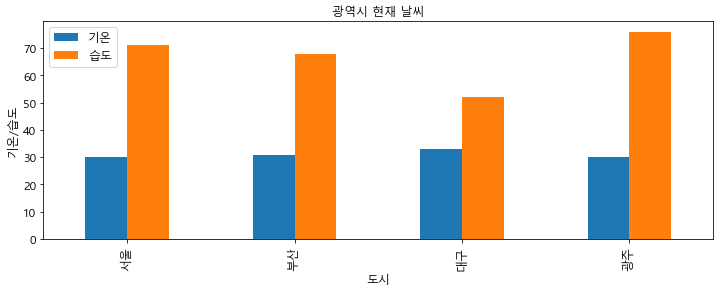

In [15]:
ax = city_weather.plot(kind = 'bar',
                      title = '광역시 현재 날씨',
                      figsize = (12,4),
                      legend = True,
                      fontsize = 12)
ax.set_xlabel('도시', fontsize = 12)
ax.set_ylabel('기온/습도', fontsize = 12)
ax.legend(['기온', '습도'], fontsize = 12)